# **Домашнее задание**

Даны два массива с рукописными буквами и с характеристиками вина. 

Выбрать датасет, возможно, предварительно обработать, создать модель, обучить и проверить точность на тестовом датасете. Напишите свои мысли по поводу результатов.

При желании можно рассмотреть оба датасета, можете попробовать применить другие методы машинного обучения, известные вам, и сравнить результаты обучения.

In [183]:
# !pip install tensorflow == 2.7.0

In [184]:
# Импорт библиотек

import numpy as np
from numpy import where
import matplotlib.pyplot as plt
import random as python_random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Normalization
from keras.utils.vis_utils import plot_model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

print(f'Tensorflow version: {tf.__version__}')

Tensorflow version: 2.8.2


In [185]:
# Вспомогательные функции

# Фиксирование случайных значений
def randomstate(seed=42):
  np.random.seed(seed)
  tf.random.set_seed(seed)

# Построение графика для изображения
def plot_image(i, predictions_array, true_label, img, labels_name):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(labels_name[predicted_label],
                                100*np.max(predictions_array),
                                labels_name[true_label]),
                                color=color)

# Построение графика для визуализации правильных ответов с определенной вероятностью для изображений
def plot_value_array(i, predictions_array, true_label, len_labels):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(len_labels))
  plt.yticks([])
  thisplot = plt.bar(range(len_labels), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# График сравнения распределения классов для датасета с вином
def plot_for_wine(X_test, y_test, y_pred):
  plt.subplot(221)
  for class_value in range(3):
    row_ix = where(y_test == class_value)
    plt.scatter(X_test[row_ix, 0], X_test[row_ix, 1])
  plt.title('Test labels')

  plt.subplot(222)
  for class_value in range(3):
    row_ix = where(y_pred == class_value)
    plt.scatter(X_test[row_ix, 0], X_test[row_ix, 1])
  plt.title('Predict labels')

  plt.show()

# Датасет с винами

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

### **ДАННЫЕ**

In [186]:
data = load_wine()

In [187]:
list(data.target_names)

['class_0', 'class_1', 'class_2']

In [188]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [189]:
data.data.shape, data.target.shape

((178, 13), (178,))

In [190]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, shuffle=True, random_state=0)

In [191]:
X_train

array([[1.364e+01, 3.100e+00, 2.560e+00, ..., 9.600e-01, 3.360e+00,
        8.450e+02],
       [1.260e+01, 2.460e+00, 2.200e+00, ..., 7.300e-01, 1.580e+00,
        6.950e+02],
       [1.196e+01, 1.090e+00, 2.300e+00, ..., 9.900e-01, 3.130e+00,
        8.860e+02],
       ...,
       [1.242e+01, 1.610e+00, 2.190e+00, ..., 1.060e+00, 2.960e+00,
        3.450e+02],
       [1.390e+01, 1.680e+00, 2.120e+00, ..., 9.100e-01, 3.330e+00,
        9.850e+02],
       [1.416e+01, 2.510e+00, 2.480e+00, ..., 6.200e-01, 1.710e+00,
        6.600e+02]])

## **Необходимо добавить стандартизацию данных!**

In [192]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit(X_train).transform(X_train)
X_test = scaler.transform(X_test)

In [193]:
X_train

array([[ 0.79996869,  0.63400362,  0.71783316, ...,  0.05445565,
         1.0713277 ,  0.31500451],
       [-0.49875982,  0.06171955, -0.61072701, ..., -0.93473577,
        -1.39249704, -0.18138885],
       [-1.29797736, -1.16332605, -0.24168252, ...,  0.18348062,
         0.75296832,  0.45068536],
       ...,
       [-0.72353975, -0.69834524, -0.64763146, ...,  0.48453887,
         0.51765922, -1.33964004],
       [ 1.12465081, -0.63575167, -0.90596261, ..., -0.16058596,
         1.02980256,  0.77830498],
       [ 1.44933294,  0.10642924,  0.42259757, ..., -1.40782731,
        -1.21255479, -0.29721397]])

In [194]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [195]:
print(X_train.shape, len(y_train), y_train[:10], sep='\n')

(133, 13)
133
[0 2 1 2 0 2 2 0 2 0]


In [196]:
print(X_test.shape, len(y_test), y_test[:10], sep='\n')

(45, 13)
45
[0 2 1 0 1 1 0 2 1 1]


In [197]:
# Нормализация данных

normalizer = Normalization(axis=-1)
normalizer.adapt(X_train)

normalized_data = normalizer(X_train)
print("var: %.4f" % np.var(normalized_data))
print("mean: %.4f" % np.mean(normalized_data))

var: 1.0000
mean: -0.0000


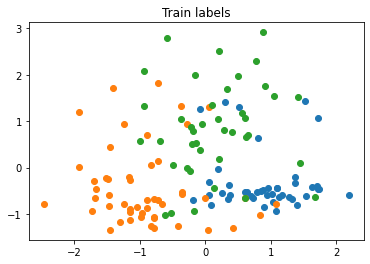

In [198]:
# График распределения классов

for class_value in range(3):
	row_ix = where(y_train == class_value)
	plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1])

plt.title('Train labels')
plt.show()

### **ОБУЧЕНИЕ НЕЙРОННОЙ СЕТИ**

In [199]:
# # Создание модели

# randomstate()

# model_w = keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(13,)),
#     keras.layers.Dense(90, activation='tanh'),
#     keras.layers.Dense(3)
# ])

# model_w.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#                  metrics=['accuracy'])


In [200]:
# Создание другой модели

randomstate()

model_w = keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(13,)),
    keras.layers.Dense(500, activation='tanh'),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(3)
])

model_w.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])


In [201]:
model_w.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 500)               7000      
                                                                 
 dense_34 (Dense)            (None, 128)               64128     
                                                                 
 dense_35 (Dense)            (None, 3)                 387       
                                                                 
Total params: 71,515
Trainable params: 71,515
Non-trainable params: 0
_________________________________________________________________


In [202]:
hstr = model_w.fit(X_train, y_train, validation_split=0.2, epochs=7, verbose=2)

# Epoch 7/7
# 4/4 - 0s - loss: 0.7631 - accuracy: 0.7547 - val_loss: 0.8425 - val_accuracy: 0.6296 - 31ms/epoch - 8ms/step - точность БЕЗ стандартизации

Epoch 1/7
4/4 - 1s - loss: 0.8208 - accuracy: 0.6226 - val_loss: 0.2026 - val_accuracy: 1.0000 - 592ms/epoch - 148ms/step
Epoch 2/7
4/4 - 0s - loss: 0.1864 - accuracy: 0.9623 - val_loss: 0.0772 - val_accuracy: 1.0000 - 46ms/epoch - 12ms/step
Epoch 3/7
4/4 - 0s - loss: 0.0911 - accuracy: 0.9811 - val_loss: 0.0547 - val_accuracy: 1.0000 - 35ms/epoch - 9ms/step
Epoch 4/7
4/4 - 0s - loss: 0.0582 - accuracy: 0.9906 - val_loss: 0.0599 - val_accuracy: 0.9630 - 37ms/epoch - 9ms/step
Epoch 5/7
4/4 - 0s - loss: 0.0410 - accuracy: 0.9906 - val_loss: 0.0716 - val_accuracy: 0.9630 - 47ms/epoch - 12ms/step
Epoch 6/7
4/4 - 0s - loss: 0.0336 - accuracy: 0.9906 - val_loss: 0.0845 - val_accuracy: 0.9630 - 35ms/epoch - 9ms/step
Epoch 7/7
4/4 - 0s - loss: 0.0281 - accuracy: 0.9906 - val_loss: 0.0976 - val_accuracy: 0.9630 - 43ms/epoch - 11ms/step


### **ОЦЕНКА**

In [203]:
# Оценка модели на тесте

model_w.evaluate(X_test, y_test)

# 2/2 [==============================] - 0s 7ms/step - loss: 0.6980 - accuracy: 0.8222 - точность БЕЗ стандартизации
# [0.6979676485061646, 0.8222222328186035]

2/2 [==============================] - 0s 6ms/step - loss: 0.0269 - accuracy: 1.0000


[0.026890266686677933, 1.0]

### **ПРЕДСКАЗАНИЯ**

In [204]:
probability_model = tf.keras.Sequential([model_w, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)

In [205]:
print(predictions[0],
      np.argmax(predictions[0]),
      y_test[0],
      sep='\n')

[9.9877316e-01 1.8312928e-04 1.0437561e-03]
0
0


In [206]:
y_pred = np.array([np.argmax(predictions[i]) for i in range(predictions.shape[0])])

### **ВИЗУАЛИЗАЦИЯ**

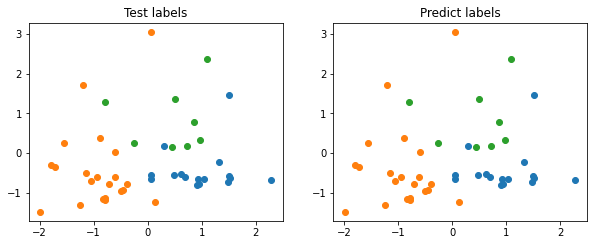

In [207]:
# График распределения классов на реальных ответах и предсказаниях

plt.figure(figsize=(10, 8))
plot_for_wine(X_test, y_test, y_pred)

### **ОБУЧЕНИЕ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ**

In [208]:
# Создание модели

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

1.0

In [209]:
# Предсказание ответов

y_pred = pipe.predict(X_test)

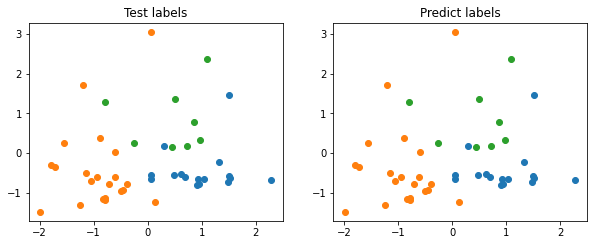

In [210]:
# График распределения классов на реальных ответах и предсказаниях

plt.figure(figsize=(10, 8))
plot_for_wine(X_test, y_test, y_pred)

### **ВЫВОД**

С помощью нейронной сети удалось добиться точности на тесте в **0.8222**. При этом на трейне точность была ниже - **0.7547**.

Предсказания с помощью логистической регрессии оказались лучше и показали 100% результат.

### **<font color='red'>После проведения стандартизации и добавления большего количества нейронов, удалость добиться 100% точности на тесте!</font>**

# Датасет с рукописными буквами

https://www.tensorflow.org/datasets/catalog/binary_alpha_digits

### **ДАННЫЕ**

In [211]:
# Загрузка данных

X = np.load('/content/drive/MyDrive/Colab Notebooks/Нейронные сети/binary_alpha_digits_images.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/Нейронные сети/binary_alpha_digits_labels.npy')

# Выделение названий классов

classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(classes)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [212]:
len(classes)

36

In [213]:
X.shape, y.shape

((1404, 20, 16), (1404,))

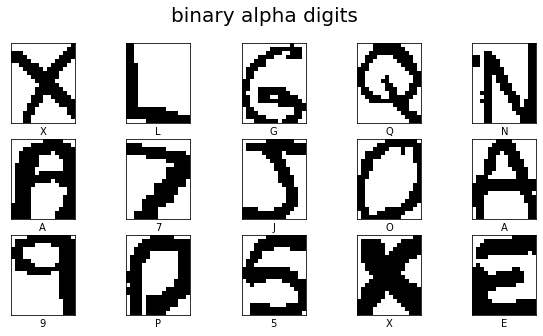

In [214]:
# Визуализация изображений

fig, axes = plt.subplots(3, 5, figsize=(10, 5))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[y[n]])
    n += 1

In [215]:
# Деление на тренировочную и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

In [216]:
X_train[1]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0,

## **Делить на 255 не нужно, так как данные станут слишком маленькими!**

In [217]:
# # Нормализация данных

# X_train = X_train / 255.0
# X_test = X_test / 255.0

In [218]:
print(X_train.shape, len(y_train), [classes[i] for i in y_train[:10]], sep='\n')

(940, 20, 16)
940
['C', 'Y', 'Y', 'G', 'V', '2', '6', 'T', 'O', 'G']


In [219]:
print(X_test.shape, len(y_test), [classes[i] for i in y_test[:10]], sep='\n')

(464, 20, 16)
464
['D', 'S', '4', 'A', 'V', 'O', 'G', 'L', 'V', '2']


### **ОБУЧЕНИЕ НЕЙРОННОЙ СЕТИ**

In [220]:
# # Создание модели

# randomstate()

# model_rb = keras.Sequential([
#     keras.layers.Flatten(input_shape=(20, 16)),
#     keras.layers.Dense(250, activation='tanh'),
#     keras.layers.Dense(200, activation='tanh'),
#     keras.layers.Dense(150, activation='tanh'),
#     keras.layers.Dense(36)
# ])

# model_rb.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
#                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#                  metrics=['accuracy'])


In [221]:
# Создание другой модели

randomstate()

model_rb = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(250, activation='tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(150, activation='tanh'),
    keras.layers.Dense(36)
])

model_rb.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), # изменили оптимизатор, спокойнее будет learning_rate
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])


In [222]:
model_rb.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 320)               0         
                                                                 
 dense_36 (Dense)            (None, 250)               80250     
                                                                 
 dropout_5 (Dropout)         (None, 250)               0         
                                                                 
 dense_37 (Dense)            (None, 150)               37650     
                                                                 
 dense_38 (Dense)            (None, 36)                5436      
                                                                 
Total params: 123,336
Trainable params: 123,336
Non-trainable params: 0
_________________________________________________________________


In [223]:
hstr = model_rb.fit(X_train, y_train, validation_split=0.2, epochs=13, verbose=2)

# Epoch 1/15
# 24/24 - 1s - loss: 3.5186 - accuracy: 0.0585 - val_loss: 3.3265 - val_accuracy: 0.0851 - 532ms/epoch - 22ms/step 
# 24/24 (количество итераций, зависит от batch_size, если уменьшить его, то итераций будет больше (понадобится больше шагов, чтобы пройти весь датасет), если увеличить — соответственно меньше)


# Epoch 15/15
# 24/24 - 0s - loss: 0.3798 - accuracy: 0.8644 - val_loss: 1.6950 - val_accuracy: 0.5745 - 116ms/epoch - 5ms/step - с нормализацией

Epoch 1/13
24/24 - 1s - loss: 3.0134 - accuracy: 0.2061 - val_loss: 2.2531 - val_accuracy: 0.3191 - 826ms/epoch - 34ms/step
Epoch 2/13
24/24 - 0s - loss: 1.3944 - accuracy: 0.5798 - val_loss: 1.5571 - val_accuracy: 0.4787 - 119ms/epoch - 5ms/step
Epoch 3/13
24/24 - 0s - loss: 0.9921 - accuracy: 0.6888 - val_loss: 1.4517 - val_accuracy: 0.5798 - 116ms/epoch - 5ms/step
Epoch 4/13
24/24 - 0s - loss: 0.6558 - accuracy: 0.7979 - val_loss: 1.2650 - val_accuracy: 0.6170 - 120ms/epoch - 5ms/step
Epoch 5/13
24/24 - 0s - loss: 0.5848 - accuracy: 0.7992 - val_loss: 1.5807 - val_accuracy: 0.5479 - 112ms/epoch - 5ms/step
Epoch 6/13
24/24 - 0s - loss: 0.4119 - accuracy: 0.8657 - val_loss: 1.4926 - val_accuracy: 0.5851 - 115ms/epoch - 5ms/step
Epoch 7/13
24/24 - 0s - loss: 0.3613 - accuracy: 0.8976 - val_loss: 1.6415 - val_accuracy: 0.5745 - 112ms/epoch - 5ms/step
Epoch 8/13
24/24 - 0s - loss: 0.2667 - accuracy: 0.9069 - val_loss: 1.5164 - val_accuracy: 0.6064 - 124ms/epoch - 5ms/step
Epoch 9/13
24/2

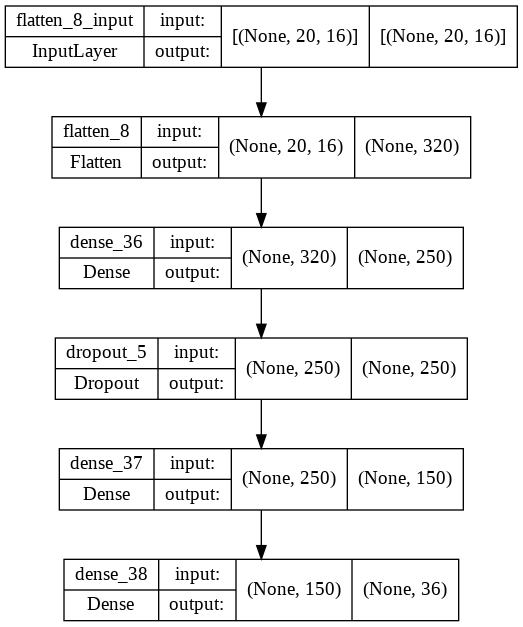

In [224]:
plot_model(model_rb, show_shapes=True, show_layer_names=True)

### **ОЦЕНКА КАЧЕСТВА**

In [225]:
# Оценка модели на тесте

model_rb.evaluate(X_test, y_test)

# 15/15 [==============================] - 0s 3ms/step - loss: 1.5832 - accuracy: 0.5905 - с нормализацией
# [1.583207130432129, 0.5905172228813171]

15/15 [==============================] - 0s 2ms/step - loss: 1.5371 - accuracy: 0.6530


[1.537061095237732, 0.6530172228813171]

### **РЕЗУЛЬТАТЫ**

In [226]:
probability_model = tf.keras.Sequential([model_rb, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)

In [227]:
print(predictions[0],
      np.argmax(predictions[0]),
      y_test[0],
      sep='\n')

[7.9945266e-02 2.4128085e-04 1.2139220e-05 3.2220689e-06 9.4370911e-04
 5.7001915e-05 3.2364496e-03 1.3498549e-04 1.7914856e-05 9.1646543e-05
 3.4050629e-03 2.5753159e-04 1.7561466e-05 8.1678504e-01 1.3632232e-05
 3.0215469e-04 8.5626823e-05 4.8947103e-02 1.6101428e-06 1.2302530e-06
 2.2219951e-04 9.3207336e-06 2.9874488e-03 1.2295200e-04 1.4687660e-02
 2.6068302e-02 2.0729154e-04 2.9434293e-04 2.3960794e-07 3.5971407e-05
 1.3757907e-04 6.2449765e-04 7.5181806e-06 1.3431158e-08 6.2542284e-07
 9.3878327e-05]
13
13


In [228]:
from sklearn.metrics import classification_report

print(classification_report(y_test,  predictions.argmax(-1)))

              precision    recall  f1-score   support

           0       0.55      0.85      0.67        13
           1       0.59      0.83      0.69        12
           2       0.29      0.88      0.44         8
           3       1.00      0.58      0.74        12
           4       0.48      0.73      0.58        15
           5       0.69      0.60      0.64        15
           6       0.78      0.88      0.82         8
           7       0.91      0.91      0.91        11
           8       0.33      0.30      0.32        10
           9       0.86      0.67      0.75        18
          10       1.00      0.43      0.60        14
          11       0.86      0.50      0.63        12
          12       0.73      1.00      0.84        16
          13       0.80      0.73      0.76        11
          14       0.78      0.93      0.85        15
          15       0.53      0.71      0.61        14
          16       0.64      0.41      0.50        17
          17       0.92    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **ВИЗУАЛИЗАЦИЯ**

### **Плохое распознование**

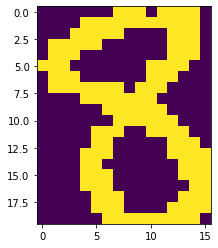

In [229]:
plt.imshow(X_test[y_test == 8][0])

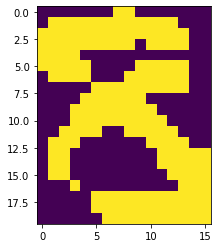

In [230]:
plt.imshow(X_test[y_test == 8][7])

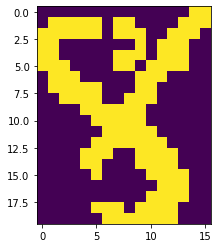

In [231]:
plt.imshow(X_test[y_test == 8][5])

### **Хорошее распознование**

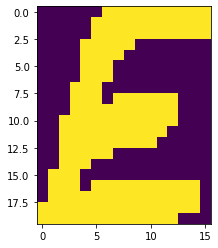

In [232]:
plt.imshow(X_test[y_test == 14][1])

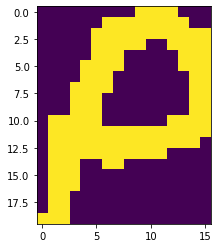

In [233]:
plt.imshow(X_test[y_test == 25][1])

(20, 16)
(1, 20, 16)
[[6.0758248e-07 1.3885880e-05 2.6220403e-06 5.9511099e-06 1.7394710e-08
  9.9103010e-01 5.1005600e-08 1.0148764e-07 2.8772722e-04 2.4414072e-05
  2.0657673e-08 1.6702869e-06 2.1317070e-05 9.6543955e-09 7.1448642e-03
  2.5782452e-04 4.7628837e-05 7.4221632e-08 6.7097062e-05 9.2036880e-06
  3.2949284e-08 2.0198556e-07 3.1491243e-09 5.2885909e-08 1.6178829e-07
  3.9276946e-07 4.4922958e-06 1.4546713e-05 1.0434438e-03 1.9675808e-05
  7.7987863e-08 2.5362056e-07 9.8240697e-08 2.5319594e-07 2.1670619e-08
  1.0042143e-06]]


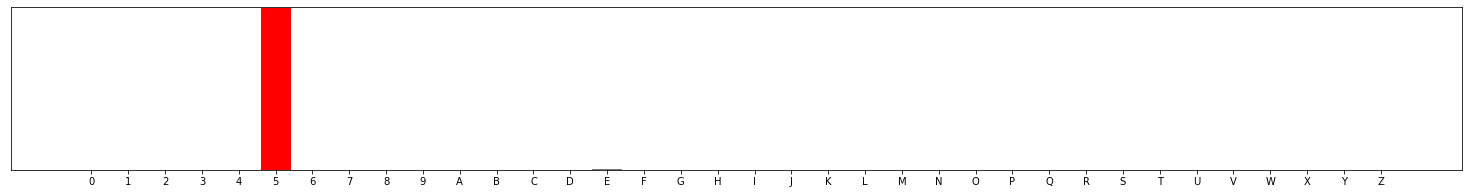

In [234]:
plt.figure(figsize=(26,3))
img = X_test[1]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))

print(img.shape)
predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], y_test, len(classes))
_ = plt.xticks(range(36), classes, rotation=0)

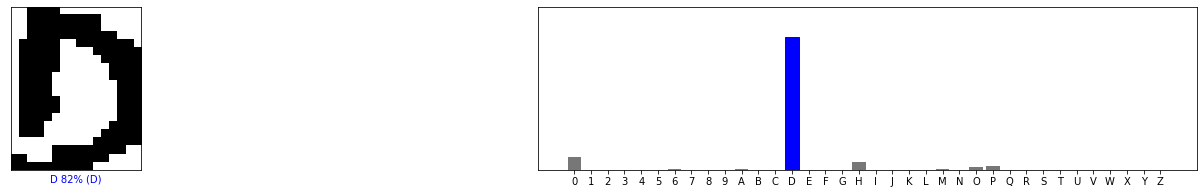

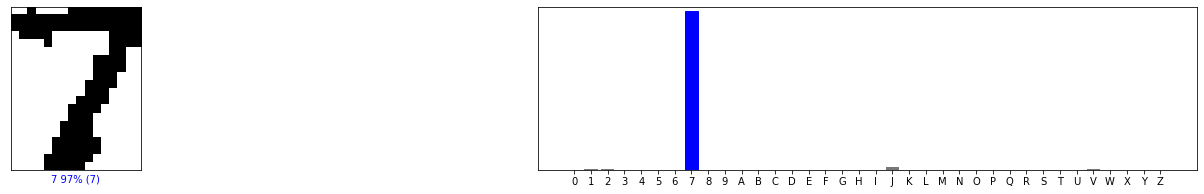

In [235]:
i = 0
plt.figure(figsize=(26,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test, classes)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test, len(classes))
_ = plt.xticks(range(36), classes, rotation=0)
plt.show()

i = 12
plt.figure(figsize=(26,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test, classes)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test, len(classes))
_ = plt.xticks(range(36), classes, rotation=0)
plt.show()


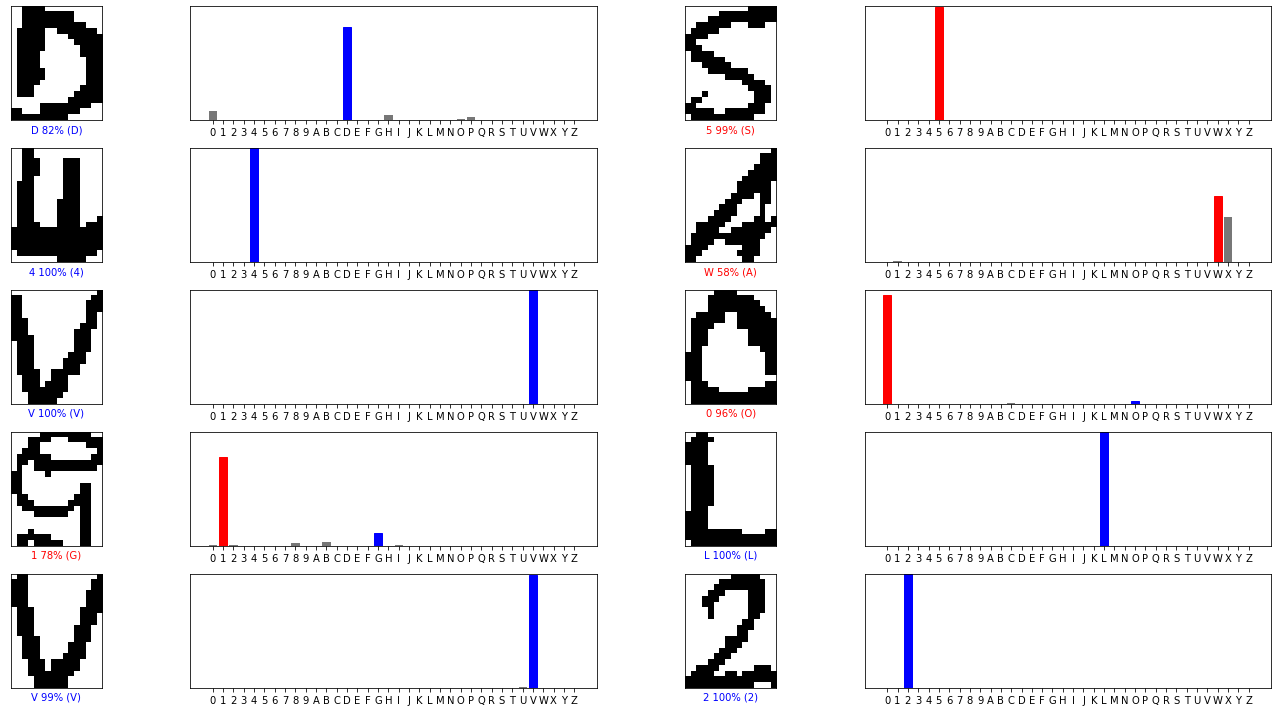

In [236]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*5*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test, classes)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)  
  plot_value_array(i, predictions[i], y_test, len(classes))
  _ = plt.xticks(range(36), classes, rotation=0) 

plt.tight_layout()

plt.show()

### **ВЫВОД**

С помощью нейронной сети удалось добиться точности на тесте в **0.5905**. На трейне точность составила **0.8644**. Вероятно, есть момент переобучения, так как разрыв довольно большой между значениями на трейне и тесте.